<a href="https://colab.research.google.com/github/kusuma1309/AI/blob/main/robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

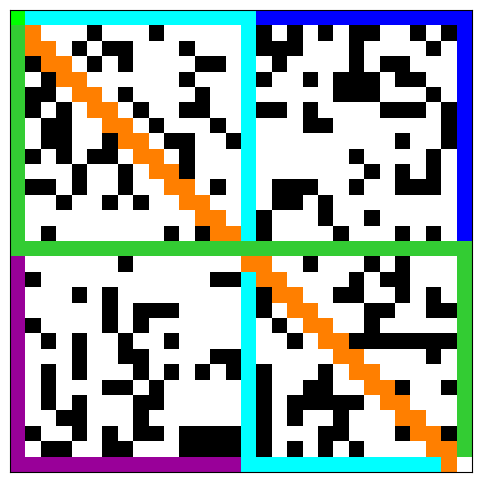

Robot automatically selected the shortest path among 6 colored paths!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

SIZE = 30
start = (0, 0)
goal = (29, 29)

grid = np.zeros((SIZE, SIZE))

# ---------- 6 CLEARLY DIFFERENT VALID PATHS ---------- #

# Path 1 – Diagonal
path1 = [(i, i) for i in range(SIZE)]

# Path 2 – Top row then down
path2 = [(0, i) for i in range(SIZE)] + [(i, SIZE-1) for i in range(1, SIZE)]

# Path 3 – Left column then right
path3 = [(i, 0) for i in range(SIZE)] + [(SIZE-1, i) for i in range(1, SIZE)]

# Path 4 – Middle horizontal corridor
path4 = [(0, 0)] + [(0, i) for i in range(1, SIZE//2)] + \
        [(i, SIZE//2) for i in range(SIZE)] + \
        [(SIZE-1, i) for i in range(SIZE//2+1, SIZE)]

# Path 5 – Staircase pattern
path5 = []
x, y = 0, 0
while x < SIZE-1 and y < SIZE-1:
    path5.append((x, y))
    x += 1
    path5.append((x, y))
    y += 1
while x < SIZE-1:
    path5.append((x, y))
    x += 1
while y < SIZE-1:
    path5.append((x, y))
    y += 1
path5.append(goal)

# Path 6 – Bottom row then up then right
path6 = [(0,0)] + [(i, 0) for i in range(1, SIZE//2)] + \
        [(SIZE//2, i) for i in range(SIZE)] + \
        [(i, SIZE-1) for i in range(SIZE//2+1, SIZE)]

paths = [path1, path2, path3, path4, path5, path6]

colors = [
    [1,0,0],        # Red
    [0,0,1],        # Blue
    [0.6,0,0.6],    # Purple
    [0,1,1],        # Cyan
    [1,0.5,0],      # Orange
    [0.2,0.8,0.2]   # Green
]

# ---------- Protect All Path Cells ----------
all_path_cells = set()
for p in paths:
    for cell in p:
        if 0 <= cell[0] < SIZE and 0 <= cell[1] < SIZE:
            all_path_cells.add(cell)

# ---------- Random Obstacles (Avoid All Paths) ----------
np.random.seed(42)
num_obstacles = 250
count = 0

while count < num_obstacles:
    x, y = np.random.randint(0, SIZE, 2)
    if (x, y) not in all_path_cells and (x, y) != start and (x, y) != goal:
        grid[x, y] = 1
        count += 1

# ---------- Choose Shortest Path ----------
valid_paths = [p for p in paths if p[-1] == goal]
best_path = min(valid_paths, key=len)

# ---------- Draw Function ----------
def draw_grid(robot_pos=None):
    display_grid = np.ones((SIZE, SIZE, 3))  # White background

    # Draw all paths
    for idx, path in enumerate(paths):
        for (x, y) in path:
            if 0 <= x < SIZE and 0 <= y < SIZE:
                display_grid[x, y] = colors[idx]

    # Draw obstacles
    for i in range(SIZE):
        for j in range(SIZE):
            if grid[i, j] == 1:
                display_grid[i, j] = [0,0,0]

    # Start & Goal
    display_grid[start] = [0,1,0]
    display_grid[goal] = [1,1,0]

    # Robot
    if robot_pos:
        display_grid[robot_pos] = [1,1,1]

    plt.figure(figsize=(6,6))
    plt.imshow(display_grid)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# ---------- Robot Movement ----------
for position in best_path:
    clear_output(wait=True)
    draw_grid(robot_pos=position)
    time.sleep(0.7)

print("Robot automatically selected the shortest path among 6 colored paths!")


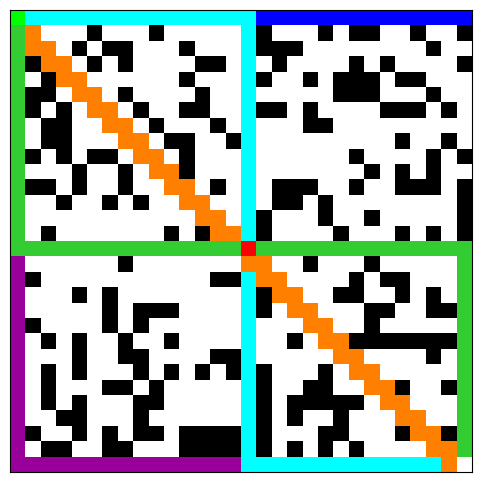

Robot reached junction, turned RIGHT, and reached destination.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

SIZE = 30
start = (0, 0)
goal = (29, 29)

grid = np.zeros((SIZE, SIZE))

# ---------- 6 CLEARLY DIFFERENT VALID PATHS ---------- #

# Path 1 – Diagonal (Red)
path1 = [(i, i) for i in range(SIZE)]

# Path 2 – Blue (Modified to pass through junction row)
path2 = [(0, i) for i in range(SIZE)] + [(i, SIZE//2) for i in range(1, SIZE)]

# Path 3 – Left column then right (Purple)
path3 = [(i, 0) for i in range(SIZE)] + [(SIZE-1, i) for i in range(1, SIZE)]

# Path 4 – Cyan middle corridor
path4 = [(0, 0)] + [(0, i) for i in range(1, SIZE//2)] + \
        [(i, SIZE//2) for i in range(SIZE)] + \
        [(SIZE-1, i) for i in range(SIZE//2+1, SIZE)]

# Path 5 – Orange staircase
path5 = []
x, y = 0, 0
while x < SIZE-1 and y < SIZE-1:
    path5.append((x, y))
    x += 1
    path5.append((x, y))
    y += 1
while x < SIZE-1:
    path5.append((x, y))
    x += 1
while y < SIZE-1:
    path5.append((x, y))
    y += 1
path5.append(goal)

# Path 6 – Green bottom corridor
path6 = [(0,0)] + [(i, 0) for i in range(1, SIZE//2)] + \
        [(SIZE//2, i) for i in range(SIZE)] + \
        [(i, SIZE-1) for i in range(SIZE//2+1, SIZE)]

paths = [path1, path2, path3, path4, path5, path6]

colors = [
    [1,0,0],        # Red
    [0,0,1],        # Blue
    [0.6,0,0.6],    # Purple
    [0,1,1],        # Cyan
    [1,0.5,0],      # Orange
    [0.2,0.8,0.2]   # Green
]

# -------- Junction --------
junction = (SIZE//2, SIZE//2)

# ---------- Protect All Path Cells ----------
all_path_cells = set()
for p in paths:
    for cell in p:
        if 0 <= cell[0] < SIZE and 0 <= cell[1] < SIZE:
            all_path_cells.add(cell)

# ---------- Random Obstacles ----------
np.random.seed(42)
num_obstacles = 250
count = 0

while count < num_obstacles:
    x, y = np.random.randint(0, SIZE, 2)
    if (x, y) not in all_path_cells and (x, y) != start and (x, y) != goal:
        grid[x, y] = 1
        count += 1

# ---------- Choose Shortest Path ----------
valid_paths = [p for p in paths if p[-1] == goal]
best_path = min(valid_paths, key=len)

# --------- Modify Robot Path at Junction (Force Right Turn) ---------
if junction in best_path:
    idx = best_path.index(junction)
    # Force move RIGHT from junction
    right_path = [(junction[0], j) for j in range(junction[1], SIZE)]
    down_path = [(i, SIZE-1) for i in range(junction[0]+1, SIZE)]
    best_path = best_path[:idx+1] + right_path + down_path

# ---------- Draw Function ----------
def draw_grid(robot_pos=None):
    display_grid = np.ones((SIZE, SIZE, 3))

    # Draw paths
    for idx, path in enumerate(paths):
        for (x, y) in path:
            display_grid[x, y] = colors[idx]

    # Obstacles
    for i in range(SIZE):
        for j in range(SIZE):
            if grid[i, j] == 1:
                display_grid[i, j] = [0,0,0]

    # Traffic Signal (Red square)
    display_grid[junction] = [1,0,0]

    # Start & Goal
    display_grid[start] = [0,1,0]
    display_grid[goal] = [1,1,0]

    # Robot
    if robot_pos:
        display_grid[robot_pos] = [1,1,1]

    plt.figure(figsize=(6,6))
    plt.imshow(display_grid)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# ---------- Robot Movement ----------
for position in best_path:
    clear_output(wait=True)
    draw_grid(robot_pos=position)

    if position == junction:
        time.sleep(1.5)  # Wait at signal
    else:
        time.sleep(0.7)

print("Robot reached junction, turned RIGHT, and reached destination.")
